In [1]:
# MNIST Dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
# Train - test split
X_train.shape[0], X_test.shape[0]

(60000, 10000)

In [3]:
image_width = X_train.shape[1]
image_height = X_train.shape[2]

In [4]:
# Is 5 ys
y_train = y_train==5
y_test = y_test==5

TRAINING DATA


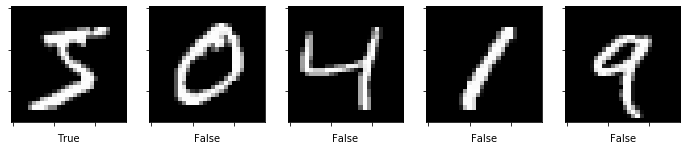

In [5]:
# See Dataset
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 5, figsize=(12, 12))
for i in range(5):
    axs[i].imshow(X_train[i], cmap='gray')
    axs[i].set_xlabel(y_train[i])
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
print("TRAINING DATA")
plt.show()

TESTING DATA


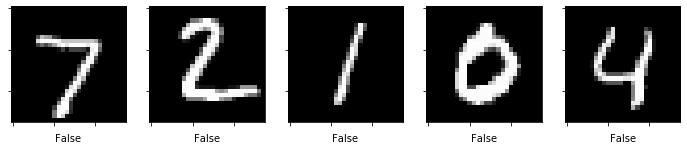

In [6]:
fig, axs = plt.subplots(1, 5, figsize=(12, 12))
for i in range(5):
    axs[i].imshow(X_test[i], cmap='gray')
    axs[i].set_xlabel(y_test[i])
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
print("TESTING DATA")
plt.show()

In [7]:
# Remove Depreciation warnings
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

In [8]:
model = Sequential()
tboard_cb = TensorBoard(log_dir='logs/')

In [9]:
model.add(Flatten(input_shape=(image_width, image_height)))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[tboard_cb])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0931 - acc: 0.9069 - val_loss: 0.0892 - val_acc: 0.9108
Epoch 2/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0903 - acc: 0.9097 - val_loss: 0.0892 - val_acc: 0.9108
Epoch 3/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0903 - acc: 0.9097 - val_loss: 0.0892 - val_acc: 0.9108
Epoch 4/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0902 - acc: 0.9098 - val_loss: 0.0891 - val_acc: 0.9109
Epoch 5/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0846 - acc: 0.9154 - val_loss: 0.0784 - val_acc: 0.9216
Epoch 6/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0782 - acc: 0.9217 - val_loss: 0.0749 - val_acc: 0.9251
Epoch 7/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0752 - acc: 0.9248 - val_loss: 0.

In [12]:
print(model.predict(X_test[:5, :, :]))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
